In [6]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import pickle
import ast
import pandas as pd
import numpy as np
import time
from sys import exc_info
import subprocess
import os

class ElbowMethod():
    
    def __init__(self, verbose=0):
        init_timer = time.time()
        self.df_b = self._load_df(verbose=verbose)
        self.df_bt_pivot = self._load_sparse_matrix(verbose=verbose)
        if verbose > 0:
            print("Time to init:", time.time() - init_timer, "sec")
        
        
    def _load_df(self, verbose):
        if verbose > 0:
            print("Loading book.csv ...")
        df_b = pd.read_csv('databases/books.csv')
        if verbose > 0:
            print("Done")
        return df_b
    
    
    def _load_sparse_matrix(self, verbose):
        if verbose > 0:
            print("computing sparse matrix ...")
        
        if verbose > 0:
            print("Loading csv ...")
        df_bt = pd.read_csv('databases/book_tags.csv')
        df_t = pd.read_csv('databases/tags.csv')
        if verbose > 0:
            print("Done")
            
        # some books are marked as having been tagged a negative number of times
        # with a certain tag; we drop those lines from df_bt
        idx = list(df_bt.loc[df_bt["count"] < 0].index.values)
        df_bt = df_bt.drop(labels=idx)
        
        # there are some duplicates in df_bt_2, we drop them
        df_bt.drop_duplicates(subset=["goodreads_book_id", "tag_id"], inplace=True)
        
        # delete tags that tag less than n books

        # delete all tags that have a low count
        
        # compute the sparse matrix, by filling all null values with 0
        df_bt = df_bt.pivot(index="goodreads_book_id", columns ="tag_id", values="count").fillna(0)
        
        # PCA into n dimensions
        
        # add all ratings + languages
        
        # feature selection
        
        if verbose > 0:
            print("Done")
        
        return df_bt

        
    def run(self, k_min, k_max, max_iterations=300, verbose=0):
        run_timer = time.time()
        wcss = []
        differences = []
        kmeans_list = []
        
        if verbose:
            print(f"Begin fitting for {k_max - k_min + 1} different numbers of clusters ...")
        
        for n_clusters in range(k_min, k_max + 1):
            if verbose:
                print(f"Fitting for {n_clusters} clusters ...")
            kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=max_iterations, n_init=10)
            kmeans.fit(self.df_bt_pivot.values)
            kmeans_list.append(kmeans)
            wcss.append(kmeans.inertia_)
            if verbose:
                print("Done")
        
        for i in range(len(wcss)-1):
            differences.append(wcss[i] - wcss[i+1])
        
        if verbose > 0:
            print("Run time:", time.time() - run_timer, "sec")
        
        self._plot(wcss, differences, 10)
    
    
    def _plot(self, wcss, differences, boundary, upto=None):
        if upto == None:
            wcss = wcss
            diff = differences
        else:
            wcss = wcss[:upto]
            diff = differences[:upto]
        
        plt.figure(figsize=(15, 6))
        
        plt.subplot(121).set_title("wcss = f(n_clusters)")
        plt.plot(range(1, len(wcss) + 1), wcss)
        plt.grid()
        
        plt.subplot(122).set_title("differences in each subsequent n_clusters")
        X = range(1, len(diff) + 1)
        plt.plot(X, diff)
        plt.plot(X, np.ones(len(diff)) * boundary, "r")
        plt.plot(X, np.ones(len(diff)) * (-boundary), "r")
        
        plt.show()

In [7]:
elbow_method = ElbowMethod(verbose=1)

Loading book.csv ...
Done
computing sparse matrix ...
Loading csv ...
Done
Done
Time to init: 8.02941608428955 sec


Begin fitting for 2 different numbers of clusters ...
Fitting for 5 clusters ...
Done
Fitting for 6 clusters ...
Done
Run time: 173.87017822265625 sec


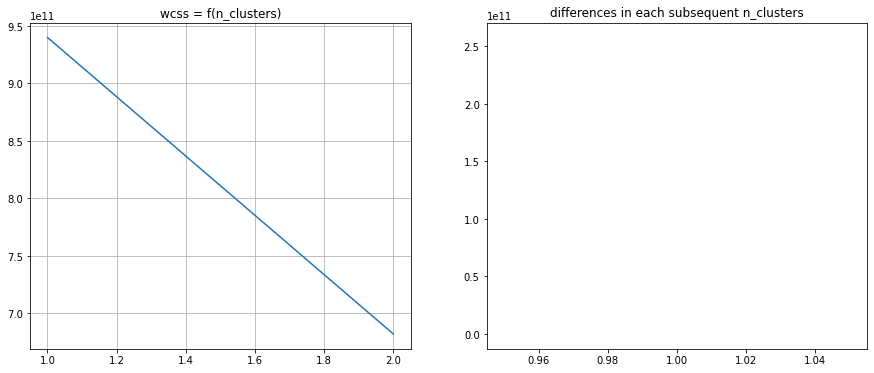

In [4]:
elbow_method.run(5, 6, verbose=1)

In [8]:
display(elbow_method.df_bt_pivot.head())

tag_id,0,1,2,3,4,5,6,7,8,9,...,34242,34243,34244,34245,34246,34247,34248,34249,34250,34251
goodreads_book_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
